https://github.com/gastonstat/CreditScoring

In [3]:
url = "https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv"

import urllib.request

urllib.request.urlretrieve(url, "CreditScoring.csv")

('CreditScoring.csv', <http.client.HTTPMessage at 0x13fc81d90>)

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("CreditScoring.csv")

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [5]:
df.head(2)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658


## Preprocessing

This dataset uses unconventional values as empty field placeholders.

In [6]:
print("uniques", df.status.unique())
print(df.status.value_counts()) # 0 is for who knows what...

df.status = df.status.map({1: "ok", 2: "default", 0: "unk"})

uniques [1 2 0]
status
1    3200
2    1254
0       1
Name: count, dtype: int64


In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [8]:
df.head(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
df.income = df.income.replace(to_replace=99999999.0, value=np.nan)
df.assets = df.assets.replace(to_replace=99999999.0, value=np.nan)
df.debt = df.debt.replace(to_replace=99999999.0, value=np.nan)

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
df.isna().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [13]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [14]:
df = df[df.status != "unk"].reset_index(drop=True)

In [15]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.status == "default").astype(int)
y_val = (df_val.status == "default").astype(int)
y_test = (df_test.status == "default").astype(int)

del df_train["status"]
del df_val["status"]
del df_test["status"]

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [17]:
train_dicts = df_train.to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [18]:
X_train[0]

array([3.6e+01, 1.0e+03, 1.0e+04, 0.0e+00, 7.5e+01, 0.0e+00, 0.0e+00,
       1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 1.4e+03, 1.0e+00, 0.0e+00, 1.0e+01,
       3.6e+01])

In [19]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [20]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, y_pred)

0.6421496209827807

In [23]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred) # heavy overfitting

1.0

In [24]:
dt_shallow = DecisionTreeClassifier(max_depth=3)
dt_shallow.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
y_pred = dt_shallow.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7389079944782155

In [26]:
y_pred = dt_shallow.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred) # less overfitting but how to choose the depth?

0.7761016984958594

In [27]:
from sklearn.tree import export_text

In [28]:
print(export_text(dt_shallow, feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



## Decision trees

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
forest = RandomForestClassifier(n_estimators=10, random_state=3)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=3)

In [31]:
y_pred = forest.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7997899057906082

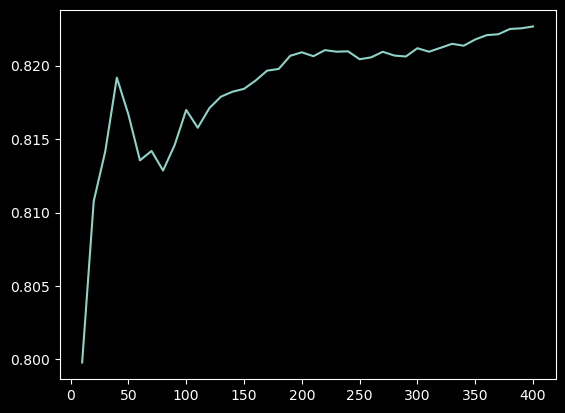

In [32]:
# let's try to find the best n_estimators

import matplotlib.pyplot as plt

scores = []

for n in range(10, 401, 10):
    forest = RandomForestClassifier(n_estimators=n, random_state=3)
    forest.fit(X_train, y_train)
    y_pred = forest.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

plt.plot([n for n, _ in scores], [auc for _, auc in scores])

## Gradient boosting

In [33]:
import xgboost as xgb

In [36]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [49]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [50]:
%%capture output

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [51]:
y_pred = model.predict(dval)

In [52]:
roc_auc_score(y_val, y_pred)

0.8167699983047153

In [53]:
# pairs (dmatrix, name)

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [54]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [55]:
%%capture output

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

In [56]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [57]:
df_score = parse_xgb_output(output)

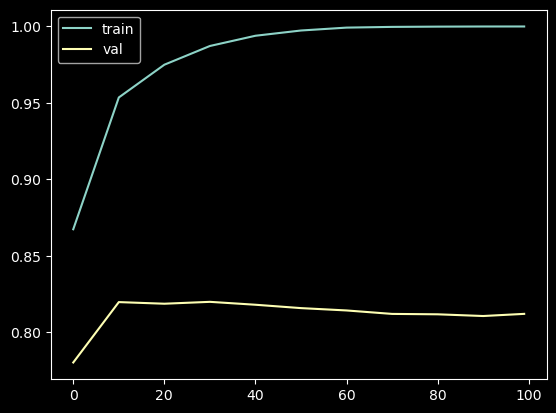

In [58]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [59]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [60]:
%%capture output

model = xgb.train(xgb_params, dtrain, num_boost_round=500, evals=watchlist, verbose_eval=10)

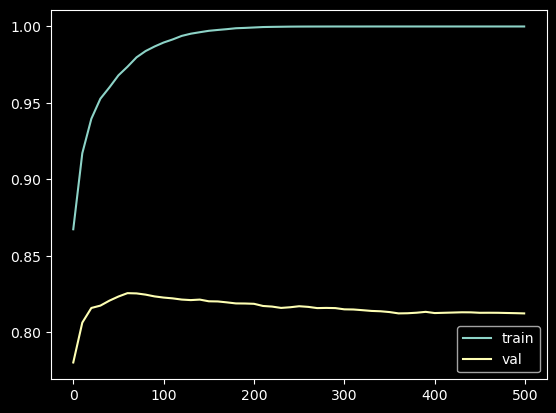

In [61]:
df_score = parse_xgb_output(output)
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()